# Importing Libraries

In [238]:
import pandas as pd 
import numpy as np 
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [239]:
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [240]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [241]:
from nltk import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.util import ngrams

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [242]:
data = pd.read_csv('webmd.csv')

In [243]:
data.shape

(362806, 12)

In [244]:
pip install faker

Note: you may need to restart the kernel to use updated packages.


In [245]:
fake = Faker() # Create an instance of the Faker class

# Creating new columns Name and Race using Faker mathod as per the requirement

In [246]:
data['Name'] = [fake.name() for _ in range(len(data))]
data['Race'] = [fake.random_element(elements=('White', 'Black', 'Asian', 'Hispanic')) for _ in range(len(data))]

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
 12  Name           362806 non-null  object
 13  Race           362806 non-null  object
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


In [248]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [249]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,Pamela Taylor,Hispanic
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,William Walker,Black
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,Bonnie Clay,Hispanic
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,Jessica Solis,Hispanic
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,Jeffrey Morse,Hispanic


In [250]:
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
Name              0
Race              0
dtype: int64

Columns reviews has 37 null values

In [251]:
data.shape

(362806, 14)

In [252]:
data[data.duplicated()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race


In [253]:
# Unique value count
for i in data.columns:
    print(i,':',data[i].nunique(),'\n')

Age : 12 

Condition : 1806 

Date : 4524 

Drug : 7093 

DrugId : 6572 

EaseofUse : 7 

Effectiveness : 7 

Reviews : 250167 

Satisfaction : 7 

Sex : 3 

Sides : 1651 

UsefulCount : 148 

Name : 180596 

Race : 4 



In [254]:
data = data.rename(columns={'Sex': 'gender'})


In [255]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,gender,Sides,UsefulCount,Name,Race
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,Pamela Taylor,Hispanic
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,William Walker,Black
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,Bonnie Clay,Hispanic
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,Jessica Solis,Hispanic
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,Jeffrey Morse,Hispanic


Observation 


'Gender' has 3 categories,
'Drug ID' has lesser values than 'Drug', 
'Condition' has lesser values than 'Drug'/'Drug ID'.

In [256]:
data['gender'].nunique()

3

In [257]:
# Value counts for each feature
for i in data.columns:
  print("----------------")
  print((data[i].value_counts()).to_frame(),'\n')
 

----------------
              Age
45-54       80043
55-64       75136
35-44       55011
25-34       49718
65-74       41216
19-24       24230
75 or over  15226
            12202
13-18        7045
7-12         1644
3-6           838
0-2           497 

----------------
                                                    Condition
Other                                                   49765
Pain                                                    25232
High Blood Pressure                                     23275
Depression                                              14509
Birth Control                                           12253
...                                                       ...
Diagnostic Test for Myasthenia Gravis                       1
Myelodysplastic Syndrome with 5q Deletion Gene ...          1
Hunter Syndrome                                             1
Increased Uric Acid due to Cancer Chemotherapy              1
Adverse Effect of Benzodiazepine-Based Tranquil.

Observation : There are lots of whitespaces in many columns. 

# Data Preprocessing 

In [258]:
# Handling instances with whitespaces
for i in data:
    data[i]=np.where(data[i]==" ",np.NAN,data[i])

In [259]:
# Null value count
data.isnull().sum()

Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41861
Satisfaction         0
gender           26537
Sides            17460
UsefulCount          0
Name                 0
Race                 0
dtype: int64

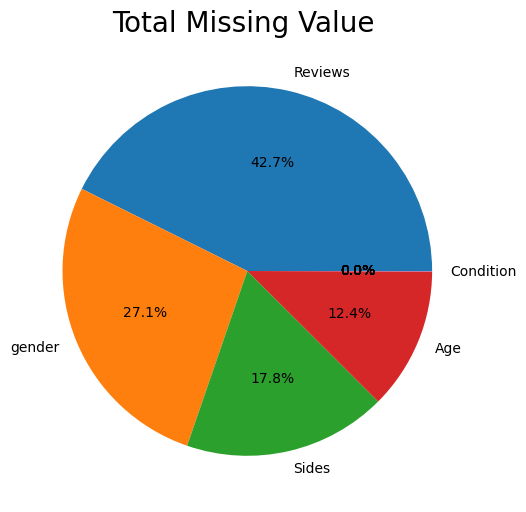

In [260]:
import matplotlib.pyplot as plt


percent = (data.isnull().sum()).sort_values(ascending=False)


percent.plot(kind="pie", figsize=(14, 6), fontsize=10, autopct='%1.1f%%')

# Set labels and title

plt.title("Total Missing Value", fontsize=20)


plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)
# Display the chart
plt.show()


Age , Sides , gender ,Reviews has missing data , and also it specifically shows condition column has no null values

In [261]:
# Removing rows with null data
data=data.dropna(axis=0)

In [262]:
data= data.reset_index(drop=True)

In [263]:
data.shape

(280127, 14)

In [264]:
data.dtypes

Age               object
Condition         object
Date              object
Drug              object
DrugId           float64
EaseofUse        float64
Effectiveness    float64
Reviews           object
Satisfaction     float64
gender            object
Sides             object
UsefulCount      float64
Name              object
Race              object
dtype: object

Date : Converting 'Date' into date-time datatype

In [265]:
data['Date']=pd.to_datetime(data['Date'], infer_datetime_format=True)

In [266]:
data.dtypes

Age                      object
Condition                object
Date             datetime64[ns]
Drug                     object
DrugId                  float64
EaseofUse               float64
Effectiveness           float64
Reviews                  object
Satisfaction            float64
gender                   object
Sides                    object
UsefulCount             float64
Name                     object
Race                     object
dtype: object

Age :handling missing values, splitting into 2 features, converting into integer datatype 

In [267]:
def age_clean(age):
  dataframe=age.str.replace("or over","-100")
  dataframe=np.where(age=="07-Dec",np.NAN,dataframe)
  dataframe=np.where(age=="03-Jun",np.NAN,dataframe)
  return dataframe

In [268]:
data['Age'] = age_clean(data['Age'])

In [269]:
# Removing therows with null data
data=data.dropna(axis=0)

In [270]:
data.reset_index(drop=True)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,gender,Sides,UsefulCount,Name,Race
0,75 -100,Stuffy Nose,2014-09-21,25dph-7.5peh,146724.0,5.0,5.0,I'm a retired physician and of all the meds I ...,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0,Pamela Taylor,Hispanic
1,25-34,Cold Symptoms,2011-01-13,25dph-7.5peh,146724.0,5.0,5.0,cleared me right up even with my throat hurtin...,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0,William Walker,Black
2,25-34,Birth Control,2017-06-15,wymzya fe,163180.0,5.0,5.0,Haven't gotten pregnant so it does it's job. I...,2.0,Female,"Nausea , vomiting , headache , bloating , ...",0.0,Amber Ramirez,Asian
3,45-54,Disease of Ovaries with Cysts,2017-01-30,wymzya fe,163180.0,5.0,5.0,I have take this for 5 years age 45-50 to prev...,5.0,Female,"Nausea , vomiting , headache , bloating , ...",0.0,Matthew Fuentes,Asian
4,55-64,Stuffy Nose,2012-10-29,"12 hour nasal relief spray, non-aerosol",9800.0,4.0,2.0,The 12 hour spray only works for me for 6 hours.,2.0,Male,"Temporary burning, stinging, dryness in the no...",0.0,Michelle Day,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280122,25-34,Stop Smoking,2008-11-16,chantix,144470.0,2.0,4.0,I have tried the patch and quitting cold turke...,4.0,Female,"Nausea , headache , vomiting , drowsiness, g...",5.0,Tiffany Spears,Hispanic
280123,55-64,Stop Smoking,2008-11-14,chantix,144470.0,5.0,5.0,I took the whole 12 weeks.I could have stopped...,5.0,Female,"Nausea , headache , vomiting , drowsiness, g...",2.0,Steven Craig,Hispanic
280124,25-34,Stop Smoking,2008-11-13,chantix,144470.0,2.0,4.0,"As long as I was on chantix, I didn't smoke. ...",2.0,Female,"Nausea , headache , vomiting , drowsiness, g...",3.0,Kimberly Chapman,Black
280125,55-64,Stop Smoking,2008-11-13,chantix,144470.0,5.0,5.0,Started this medication Oct 5th 2008. Haven't ...,5.0,Male,"Nausea , headache , vomiting , drowsiness, g...",1.0,Melissa French,Hispanic


In [271]:
data['Age'].unique()

array(['75 -100', '25-34', '45-54', '55-64', '19-24', '35-44', '13-18',
       '65-74', '7-12', '0-2', '3-6'], dtype=object)

In [272]:
data['Age'].value_counts()

45-54      64125
55-64      57469
35-44      45467
25-34      42799
65-74      29982
19-24      21233
75 -100    10727
13-18       5975
7-12        1334
3-6          623
0-2          393
Name: Age, dtype: int64

Text preprocessing 

In [273]:
data = data.rename(columns={'Sides': 'Side_Effects'}) # Renaming Sides columns to Side_Effects

In [274]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,gender,Side_Effects,UsefulCount,Name,Race
0,75 -100,Stuffy Nose,2014-09-21,25dph-7.5peh,146724.0,5.0,5.0,I'm a retired physician and of all the meds I ...,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0,Pamela Taylor,Hispanic
1,25-34,Cold Symptoms,2011-01-13,25dph-7.5peh,146724.0,5.0,5.0,cleared me right up even with my throat hurtin...,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0,William Walker,Black
2,25-34,Birth Control,2017-06-15,wymzya fe,163180.0,5.0,5.0,Haven't gotten pregnant so it does it's job. I...,2.0,Female,"Nausea , vomiting , headache , bloating , ...",0.0,Amber Ramirez,Asian
3,45-54,Disease of Ovaries with Cysts,2017-01-30,wymzya fe,163180.0,5.0,5.0,I have take this for 5 years age 45-50 to prev...,5.0,Female,"Nausea , vomiting , headache , bloating , ...",0.0,Matthew Fuentes,Asian
4,55-64,Stuffy Nose,2012-10-29,"12 hour nasal relief spray, non-aerosol",9800.0,4.0,2.0,The 12 hour spray only works for me for 6 hours.,2.0,Male,"Temporary burning, stinging, dryness in the no...",0.0,Michelle Day,Black


In [275]:
data['Side_Effects'].value_counts()

Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                                                                                                                                        11359
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                                                                                                                     10647
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                                                                                                                               7027
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.                                                             

In [276]:
data['Race'].value_counts()

White       70188
Black       70118
Asian       70117
Hispanic    69704
Name: Race, dtype: int64

In [277]:
data['Race'].isnull().sum()

0

In [278]:
#We need details such as name, age, gender, race, side effects of the patients.

In [279]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [280]:
data['gender'].value_counts()

Female    202980
Male       77147
Name: gender, dtype: int64

In [281]:
data['gender'].isnull().sum()

0

In [282]:
data['Age'].value_counts()

45-54      64125
55-64      57469
35-44      45467
25-34      42799
65-74      29982
19-24      21233
75 -100    10727
13-18       5975
7-12        1334
3-6          623
0-2          393
Name: Age, dtype: int64

In [283]:
data['Drug'].value_counts().head(20)

cymbalta                                               3949
lexapro                                                3347
lisinopril                                             3263
lisinopril solution                                    3263
effexor xr                                             2893
hydrocodone-acetaminophen                              2774
lyrica                                                 2616
tramadol hcl                                           2346
tramadol hcl er                                        2346
zoloft                                                 2185
prednisone                                             2153
prednisone tablet, delayed release (enteric coated)    2153
prednisone concentrate                                 2153
phentermine hcl                                        2102
seroquel                                               2064
topamax capsule, sprinkle                              1830
topamax                                 

In [284]:
data['Side_Effects'].value_counts()

Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                                                                                                                                        11359
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                                                                                                                     10647
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                                                                                                                               7027
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.                                                             

In [285]:
# Count occurrences of each unique entry
counts = data['Side_Effects'].value_counts()

# Filter for multiple unique entries
multiple_unique_entries = counts[counts > 1]

# Print the count of multiple unique entries
print("Number of multiple unique entries:", len(multiple_unique_entries))
print(multiple_unique_entries)

Number of multiple unique entries: 1485
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                                    11359
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                 10647
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                           7027
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.                        6326
Nausea ,  vomiting , loss of appetite,  heartburn ,  trouble sleeping , increased  sweating , or  acne  may occur.                                                4334
                                                                                                                             

# Selecting drug name lexapro fo further analysis of its effects on patients 

In [286]:
drug_lexapro= data.loc[(data['Drug'] =='lexapro')]
drug_lexapro.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,gender,Side_Effects,UsefulCount,Name,Race
21468,35-44,Anxiousness associated with Depression,2020-02-06,lexapro,63990.0,1.0,1.0,I got horrible brain zaps and very graphic tra...,1.0,Female,"Nausea , dry mouth , trouble sleeping , con...",0.0,Jasmine French,Black
21475,55-64,Depression,2020-01-23,lexapro,63990.0,5.0,3.0,It has helped my depression but not my anxiety...,3.0,Male,"Nausea , dry mouth , trouble sleeping , con...",0.0,Kara Green,Black
21481,65-74,Depression,2020-01-21,lexapro,63990.0,3.0,1.0,Was nauseated almost immediately. Diareaha and...,1.0,Female,"Nausea , dry mouth , trouble sleeping , con...",0.0,April Garcia,Hispanic
21484,75 -100,Anxiousness associated with Depression,2019-12-27,lexapro,63990.0,4.0,2.0,haven't seen much difference.,2.0,Female,"Nausea , dry mouth , trouble sleeping , con...",0.0,Elizabeth Bender,Black
21489,35-44,Depression,2019-12-20,lexapro,63990.0,5.0,5.0,I started taking Zoloft after I was diagnosed ...,4.0,Male,"Nausea , dry mouth , trouble sleeping , con...",2.0,Stephen Gallagher,Asian


In [287]:
drug_lexapro.shape

(3347, 14)

In [288]:
drug_lexapro['Condition'].value_counts()

Depression                                1546
Repeated Episodes of Anxiety               746
Panic Disorder                             262
Other                                      212
Bipolar Depression                         159
Major Depressive Disorder                  158
"Change of Life" Signs                     107
Posttraumatic Stress Syndrome               68
Obsessive Compulsive Disorder               57
Anxiousness associated with Depression      32
Name: Condition, dtype: int64

In [289]:
drug_lexapro['Condition'].value_counts().sum()

3347

In [290]:
drug_lexapro['Side_Effects'].value_counts()

Nausea ,  dry mouth ,  trouble sleeping ,  constipation , tiredness, drowsiness,  dizziness , and increased  sweating  may occur.    3347
Name: Side_Effects, dtype: int64

In [291]:
data_new = drug_lexapro.copy()

In [292]:
data_new.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,gender,Side_Effects,UsefulCount,Name,Race
21468,35-44,Anxiousness associated with Depression,2020-02-06,lexapro,63990.0,1.0,1.0,I got horrible brain zaps and very graphic tra...,1.0,Female,"Nausea , dry mouth , trouble sleeping , con...",0.0,Jasmine French,Black
21475,55-64,Depression,2020-01-23,lexapro,63990.0,5.0,3.0,It has helped my depression but not my anxiety...,3.0,Male,"Nausea , dry mouth , trouble sleeping , con...",0.0,Kara Green,Black
21481,65-74,Depression,2020-01-21,lexapro,63990.0,3.0,1.0,Was nauseated almost immediately. Diareaha and...,1.0,Female,"Nausea , dry mouth , trouble sleeping , con...",0.0,April Garcia,Hispanic
21484,75 -100,Anxiousness associated with Depression,2019-12-27,lexapro,63990.0,4.0,2.0,haven't seen much difference.,2.0,Female,"Nausea , dry mouth , trouble sleeping , con...",0.0,Elizabeth Bender,Black
21489,35-44,Depression,2019-12-20,lexapro,63990.0,5.0,5.0,I started taking Zoloft after I was diagnosed ...,4.0,Male,"Nausea , dry mouth , trouble sleeping , con...",2.0,Stephen Gallagher,Asian


In [293]:
data_new['Reviews'].value_counts().head()

Have just been given this to try from Dr. Tried effexor with horrible side effects, only used it for 3 weeks. Don't know if Depression label fits me, more aggitated and tired. I think it is more likely i am just getting to a different stage in my life (pre-menopausal). Going to give this a go once i am off my anti-bidics for a chest infection. i will keep you posted. :-)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [294]:
data_new.isnull().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
gender           0
Side_Effects     0
UsefulCount      0
Name             0
Race             0
dtype: int64

This is already a data with zero null values.

# Text processing

In [295]:
# converting rows having data other than string datatype into  string.
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Side_Effects']) != str:
        data_new.iloc[i]['Side_Effects'] = str(data_new.iloc[i]['Side_Effects'])

for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Reviews']) != str:
        data_new.iloc[i]['Reviews'] = str(data_new.iloc[i]['Reviews'])
        
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Condition']) != str:
        data_new.iloc[i]['Condition'] = str(data_new.iloc[i]['Condition'])

In [296]:
import re
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    i= re.sub("[\W+""]", " ",i)        
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

Side Effects

In [297]:
data_new.Side_Effects= data_new.Side_Effects.apply(cleaning_text)
data_new.Side_Effects

21468    nausea mouth trouble sleeping constipation tir...
21475    nausea mouth trouble sleeping constipation tir...
21481    nausea mouth trouble sleeping constipation tir...
21484    nausea mouth trouble sleeping constipation tir...
21489    nausea mouth trouble sleeping constipation tir...
                               ...                        
26639    nausea mouth trouble sleeping constipation tir...
26640    nausea mouth trouble sleeping constipation tir...
26641    nausea mouth trouble sleeping constipation tir...
26642    nausea mouth trouble sleeping constipation tir...
26643    nausea mouth trouble sleeping constipation tir...
Name: Side_Effects, Length: 3347, dtype: object

In [298]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_new['Side_Effects'] = data_new['Side_Effects'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [299]:
data_new['Side_Effects'] 

21468    nausea mouth trouble sleeping constipation tir...
21475    nausea mouth trouble sleeping constipation tir...
21481    nausea mouth trouble sleeping constipation tir...
21484    nausea mouth trouble sleeping constipation tir...
21489    nausea mouth trouble sleeping constipation tir...
                               ...                        
26639    nausea mouth trouble sleeping constipation tir...
26640    nausea mouth trouble sleeping constipation tir...
26641    nausea mouth trouble sleeping constipation tir...
26642    nausea mouth trouble sleeping constipation tir...
26643    nausea mouth trouble sleeping constipation tir...
Name: Side_Effects, Length: 3347, dtype: object

Reviews

In [300]:
data_new.review= data_new.Reviews.apply(cleaning_text)
data_new.review

C:\Users\Asus\AppData\Local\Temp\ipykernel_16448\2994194129.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_new.review= data_new.Reviews.apply(cleaning_text)


21468    horrible brain zaps very graphic tragic dreams...
21475    helped depression anxiety having trouble sleeping
21481    nauseated almost immediately diareaha bedridde...
21484                           haven seen much difference
21489    started taking zoloft after diagnosed with dep...
                               ...                        
26639    have been taking lexapro about weeks medicine ...
26640    took lexapro years never significant effects f...
26641    while using this medication feel much better f...
26642    this drug made feel like should have felt whol...
26643    this medication turned easy going into impulsi...
Name: Reviews, Length: 3347, dtype: object

# Removing Stopwords

In [301]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_new['Reviews'] = data_new['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [302]:
data_new['Reviews']

21468    I got horrible brain zaps graphic tragic dream...
21475    It helped depression anxiety. And I trouble sl...
21481    Was nauseated almost immediately. Diareaha bed...
21484                                seen much difference.
21489    I started taking Zoloft I diagnosed depression...
                               ...                        
26639    I taking Lexapro 8 weeks. The medicine working...
26640    I took Lexapro years ago never significant eff...
26641    While I using medication I feel much better. I...
26642    This drug made feel like I felt whole life. I ...
26643    This medication turned easy going man impulsiv...
Name: Reviews, Length: 3347, dtype: object

In [303]:
from textblob import TextBlob

# Assuming 'data' is a DataFrame containing the review column 'Review'

# Define a function to calculate sentiment score using TextBlob
def get_sentiment_score(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

# Apply the function to the review column and create a new column for sentiment score
data_new['SentimentScore'] = data_new['Reviews'].apply(get_sentiment_score)


In [304]:
data_new.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,gender,Side_Effects,UsefulCount,Name,Race,SentimentScore
21468,35-44,Anxiousness associated with Depression,2020-02-06,lexapro,63990.0,1.0,1.0,I got horrible brain zaps graphic tragic dream...,1.0,Female,nausea mouth trouble sleeping constipation tir...,0.0,Jasmine French,Black,-0.400000
21475,55-64,Depression,2020-01-23,lexapro,63990.0,5.0,3.0,It helped depression anxiety. And I trouble sl...,3.0,Male,nausea mouth trouble sleeping constipation tir...,0.0,Kara Green,Black,-0.200000
21481,65-74,Depression,2020-01-21,lexapro,63990.0,3.0,1.0,Was nauseated almost immediately. Diareaha bed...,1.0,Female,nausea mouth trouble sleeping constipation tir...,0.0,April Garcia,Hispanic,0.038889
21484,75 -100,Anxiousness associated with Depression,2019-12-27,lexapro,63990.0,4.0,2.0,seen much difference.,2.0,Female,nausea mouth trouble sleeping constipation tir...,0.0,Elizabeth Bender,Black,0.200000
21489,35-44,Depression,2019-12-20,lexapro,63990.0,5.0,5.0,I started taking Zoloft I diagnosed depression...,4.0,Male,nausea mouth trouble sleeping constipation tir...,2.0,Stephen Gallagher,Asian,0.295833


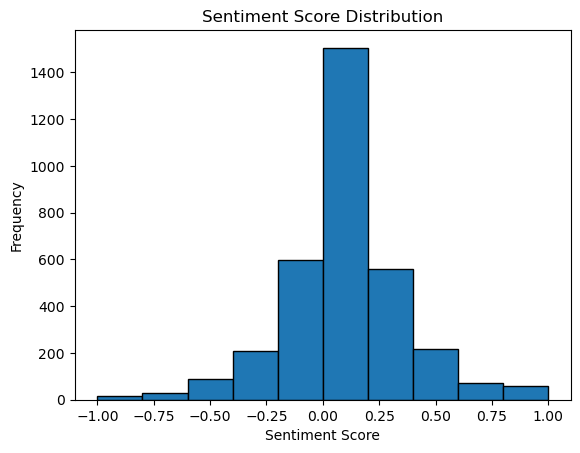

In [305]:
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame containing the sentiment scores in the 'SentimentScore' column

# Plotting the histogram
plt.hist(data_new['SentimentScore'], bins=10, edgecolor='black')

# Setting labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')

# Display the plot
plt.show()


In [306]:
# Assuming 'data' is a DataFrame containing the sentiment scores in the 'SentimentScore' column

# Define a threshold to classify sentiment scores as positive, negative, or neutral
positive_threshold = 0
negative_threshold = 0

# Create a new column 'SentimentCategory' based on the sentiment scores
data_new['SentimentCategory'] = data_new['SentimentScore'].apply(lambda score: 'Positive' if score > positive_threshold else 'Negative' if score < negative_threshold else 'Neutral')


In [307]:
data_new.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,gender,Side_Effects,UsefulCount,Name,Race,SentimentScore,SentimentCategory
21468,35-44,Anxiousness associated with Depression,2020-02-06,lexapro,63990.0,1.0,1.0,I got horrible brain zaps graphic tragic dream...,1.0,Female,nausea mouth trouble sleeping constipation tir...,0.0,Jasmine French,Black,-0.400000,Negative
21475,55-64,Depression,2020-01-23,lexapro,63990.0,5.0,3.0,It helped depression anxiety. And I trouble sl...,3.0,Male,nausea mouth trouble sleeping constipation tir...,0.0,Kara Green,Black,-0.200000,Negative
21481,65-74,Depression,2020-01-21,lexapro,63990.0,3.0,1.0,Was nauseated almost immediately. Diareaha bed...,1.0,Female,nausea mouth trouble sleeping constipation tir...,0.0,April Garcia,Hispanic,0.038889,Positive
21484,75 -100,Anxiousness associated with Depression,2019-12-27,lexapro,63990.0,4.0,2.0,seen much difference.,2.0,Female,nausea mouth trouble sleeping constipation tir...,0.0,Elizabeth Bender,Black,0.200000,Positive
21489,35-44,Depression,2019-12-20,lexapro,63990.0,5.0,5.0,I started taking Zoloft I diagnosed depression...,4.0,Male,nausea mouth trouble sleeping constipation tir...,2.0,Stephen Gallagher,Asian,0.295833,Positive


Condition

In [308]:
data_new.Condition=data_new.Condition.apply(cleaning_text)
data_new.Condition

21468    anxiousness associated with depression
21475                                depression
21481                                depression
21484    anxiousness associated with depression
21489                                depression
                          ...                  
26639                 repeated episodes anxiety
26640                        bipolar depression
26641                                     other
26642                                depression
26643                                     other
Name: Condition, Length: 3347, dtype: object

In [309]:
data_new['Satisfaction'].value_counts()

5.0    1195
4.0     710
1.0     640
3.0     512
2.0     290
Name: Satisfaction, dtype: int64

In [310]:
data_new.drop(labels = data_new[data_new['Satisfaction'] == 6].index, axis = 0, inplace = True)
data_new[data_new['Satisfaction'] == 6]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,gender,Side_Effects,UsefulCount,Name,Race,SentimentScore,SentimentCategory


In [311]:
data1=np.where(data_new['Satisfaction'] == 1.0, "Extreme", data_new['Satisfaction'])
data1=np.where(data_new['Satisfaction'] == 2.0, "Severe",data1)
data1=np.where(data_new['Satisfaction'] == 3.0, "Moderate", data1)
data1=np.where(data_new['Satisfaction'] == 4.0, "Mild", data1)
data1=np.where(data_new['Satisfaction'] == 5.0, "No Side Effects",data1)

In [312]:
data_new['Side_Effects_Severity']=data1

Here, it was analysed people who had given 5 rating on Satisfaction level had no serious side effects so it was labelled No Side effects followed by Mild, Moderate , Severe and Extreme as the rating decreases from 5 to 1.

Since DrugId is the same, dropping the column, also the satisfaction column has been converted according to side effecting severity, dropping that column too.

In [313]:
data_new.drop(['Satisfaction','DrugId'], inplace=True, axis=1)

In [314]:
data_new.head()

,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,gender,Side_Effects,UsefulCount,Name,Race,SentimentScore,SentimentCategory,Side_Effects_Severity
21468,35-44,anxiousness associated with depression,2020-02-06,lexapro,1.0,1.0,I got horrible brain zaps graphic tragic dream...,Female,nausea mouth trouble sleeping constipation tir...,0.0,Jasmine French,Black,-0.400000,Negative,Extreme
21475,55-64,depression,2020-01-23,lexapro,5.0,3.0,It helped depression anxiety. And I trouble sl...,Male,nausea mouth trouble sleeping constipation tir...,0.0,Kara Green,Black,-0.200000,Negative,Moderate
21481,65-74,depression,2020-01-21,lexapro,3.0,1.0,Was nauseated almost immediately. Diareaha bed...,Female,nausea mouth trouble sleeping constipation tir...,0.0,April Garcia,Hispanic,0.038889,Positive,Extreme
21484,75 -100,anxiousness associated with depression,2019-12-27,lexapro,4.0,2.0,seen much difference.,Female,nausea mouth trouble sleeping constipation tir...,0.0,Elizabeth Bender,Black,0.200000,Positive,Severe
21489,35-44,depression,2019-12-20,lexapro,5.0,5.0,I started taking Zoloft I diagnosed depression...,Male,nausea mouth trouble sleeping constipation tir...,2.0,Stephen Gallagher,Asian,0.295833,Positive,Mild


# Exploratory Data Analysis

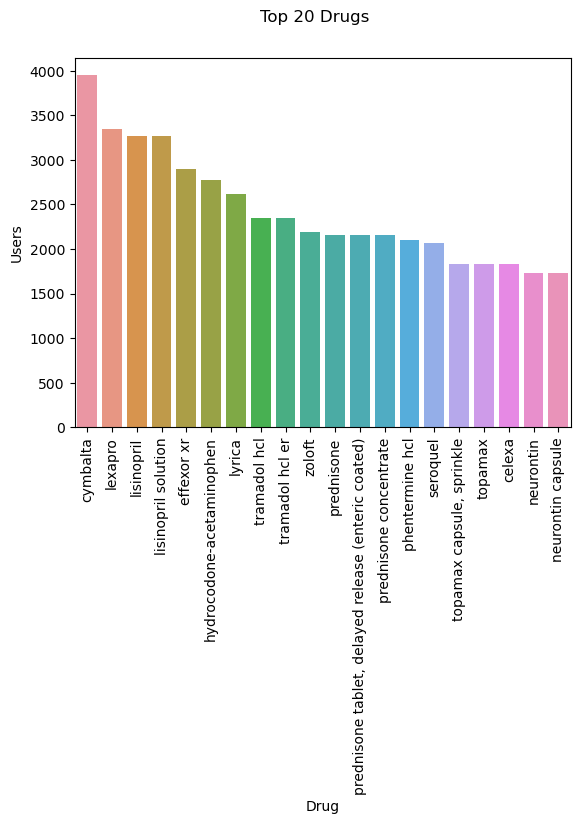

In [315]:
data1= data['Drug'].value_counts().head(20).reset_index()
data1.columns = ['Drug', 'Users']
sns.barplot(data=data1, x = 'Drug', y = 'Users')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

Observation : From the dataset, plotted the top 20 drug by users and found that cymbalta is the most used drug followed by lexapro

Text(0, 0.5, 'Users')

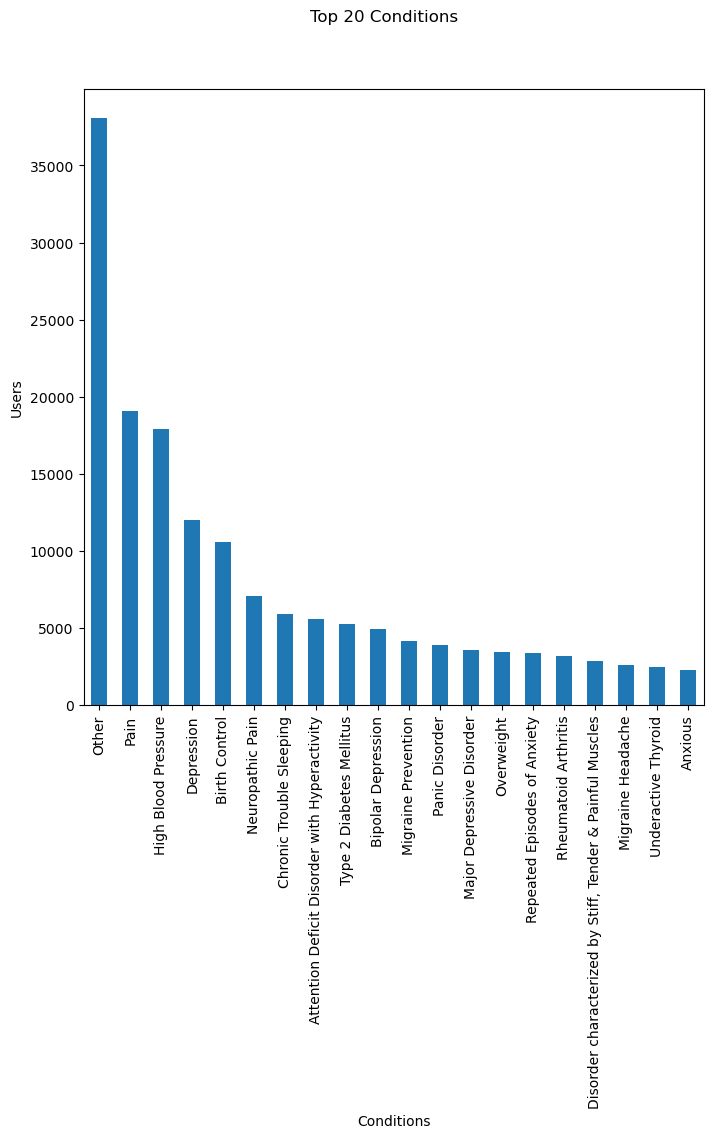

In [316]:
data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 20 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

Observation : Top 20 conditions for which the drugs are being used were plotted. 

Text(0, 0.5, 'Count')

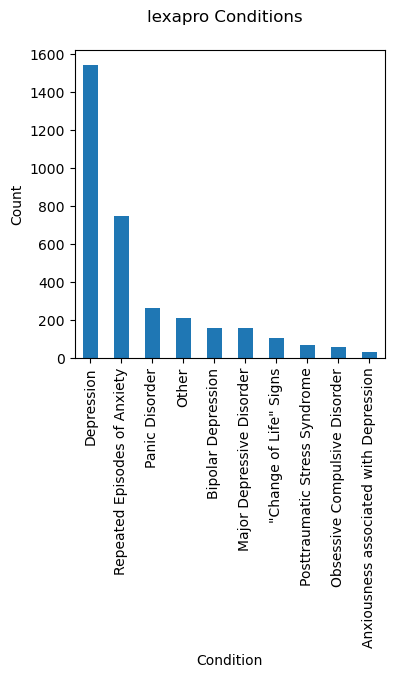

In [317]:
drug_lexapro['Condition'].value_counts().nlargest(12).plot(kind='bar',figsize=(4,4))
plt.suptitle("lexapro Conditions")
plt.xlabel('Condition')
plt.ylabel('Count')


Observation : lexapro is used in the treatment of over 9 conditions. Maximum users consume the drug for depression.

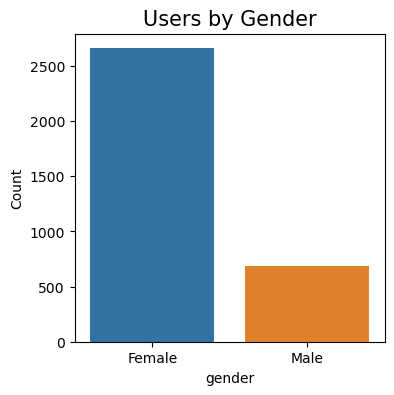

In [318]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='gender', data=drug_lexapro)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('gender')
plt.ylabel('Count') 
plt.show()

Observation : Medications for depression are taken more by females than males.

Text(0, 0.5, 'Count')

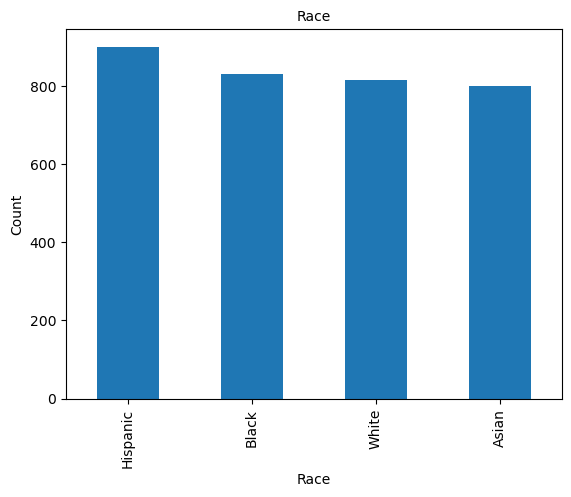

In [319]:
drug_lexapro['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

Observation : There is no noticeable difference between users of any race but Asian is considered to be taking more of this medication.

Text(0.5, 1.0, 'Users by Race and Gender')

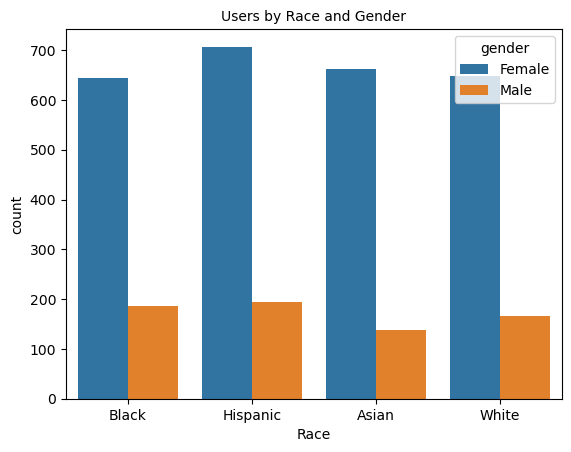

In [320]:
sns.countplot(x='Race',hue='gender',data=drug_lexapro)
plt.title("Users by Race and Gender", fontsize = 10)

Observation : Across all races , females use this drug more than males.

Text(0.5, 1.0, 'Users by Age and Gender')

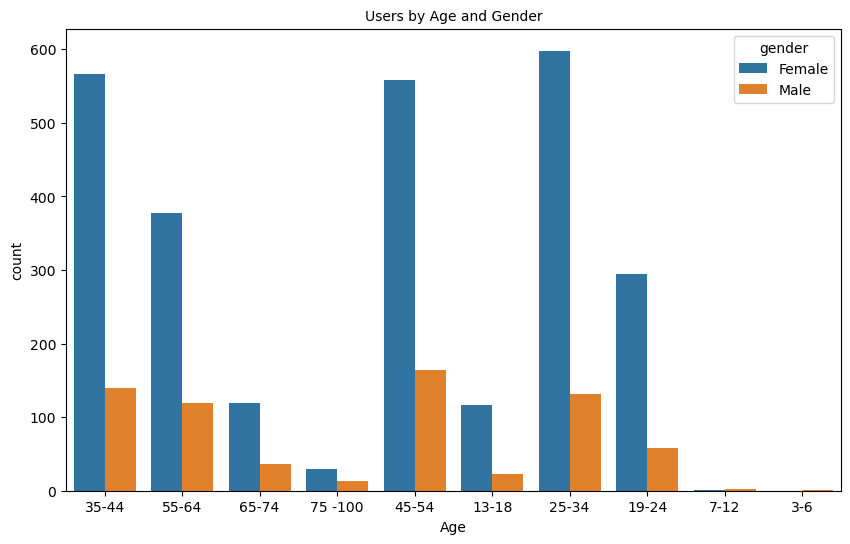

In [321]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='gender',data=drug_lexapro)
plt.title("Users by Age and Gender", fontsize = 10)

Observation : Females across age group 25-34, 35-44 , 45-54 takes this drug more and also interestingly in case of males, age group 35-44 followed by 45-54 are taking this drugs in more numbers.

Effectiveness

Text(0, 0.5, 'Count')

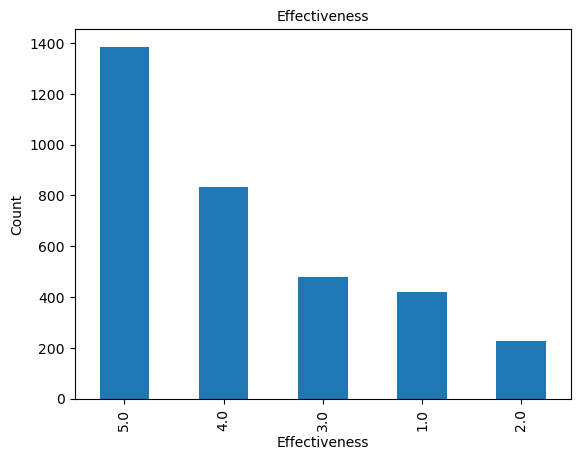

In [322]:
drug_lexapro['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

In [323]:
drug_lexapro['Effectiveness'].value_counts().max()

1386

Observation : Out of 3347 details, 1386 are found to be given 5 rating on effectiveness which is above 41.4% of the total informations, making it most effective rating.

Ease of Use

Text(0, 0.5, 'Count')

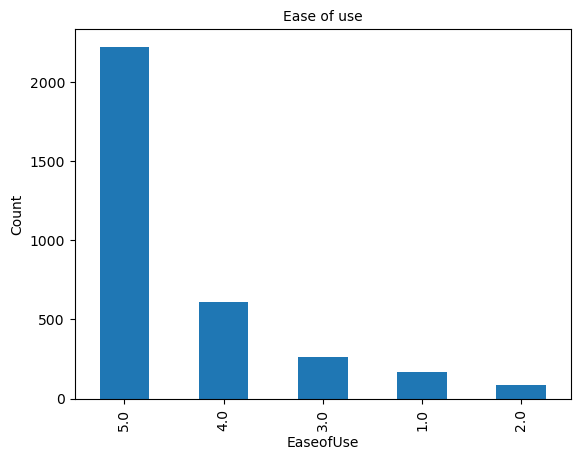

In [324]:
drug_lexapro['EaseofUse'].value_counts().plot(kind='bar')
plt.title("Ease of use", fontsize = 10)
plt.xlabel("EaseofUse", fontsize = 10)
plt.ylabel("Count", fontsize = 10)


In [325]:
drug_lexapro['EaseofUse'].value_counts().max()

2222

Observation : Most users( 2222 out of 3347) find lexapro easy to use. 

Text(0.5, 1.0, 'Users by Effectiveness')

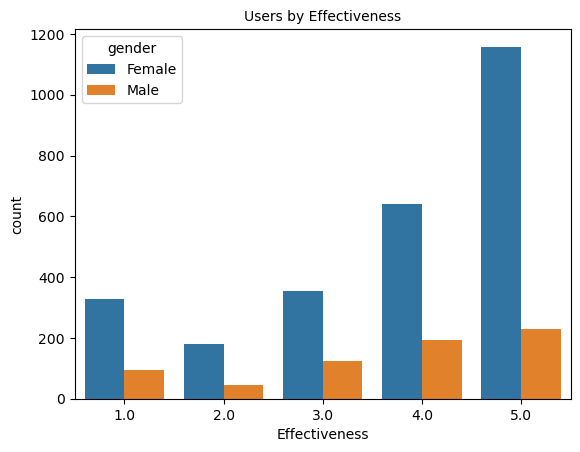

In [326]:
sns.countplot(x='Effectiveness',hue='gender',data=drug_lexapro)
plt.title("Users by Effectiveness", fontsize = 10)

Observation : One cannot always explicitly say from the above figure that women are experiencing highly effectiveness due to this drug owing to the fact that there are lots of female drug users compared to men. So inorder to check the effectiveness, we group data by gender and effectiveness and then get the count and caluculate its percentage.

In [327]:

# Assuming 'drug_lexapro' - dataset with columns 'Effectiveness' and 'gender'

# Group the data by 'gender' and 'Effectiveness' and calculate the counts
effectiveness_counts = drug_lexapro.groupby(['gender', 'Effectiveness']).size().reset_index(name='Count')

# Calculate the total count of users for each gender
gender_totals = effectiveness_counts.groupby('gender')['Count'].sum()

# Calculate the percentage of each effectiveness level for each gender
effectiveness_counts['Percentage'] = effectiveness_counts.apply(lambda row: row['Count'] / gender_totals[row['gender']] * 100, axis=1)

# Print the resulting dataframe
print(effectiveness_counts)


   gender  Effectiveness  Count  Percentage
0  Female            1.0    327   12.288613
1  Female            2.0    180    6.764374
2  Female            3.0    355   13.340849
3  Female            4.0    641   24.088688
4  Female            5.0   1158   43.517475
5    Male            1.0     93   13.556851
6    Male            2.0     46    6.705539
7    Male            3.0    125   18.221574
8    Male            4.0    194   28.279883
9    Male            5.0    228   33.236152


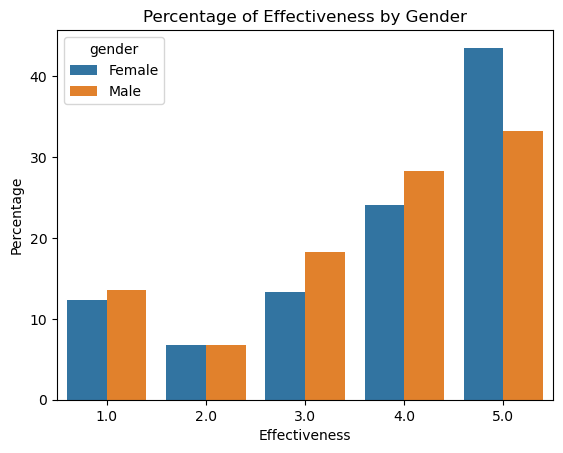

In [328]:

# Assuming 'effectiveness_counts' dataframe contains the calculated percentages

sns.barplot(x='Effectiveness', y='Percentage', hue='gender', data=effectiveness_counts)
plt.title("Percentage of Effectiveness by Gender")
plt.ylabel("Percentage")
plt.xlabel("Effectiveness")
plt.show()


Observation : From here we can claim that indeed this particular drug shows high effectiveness on females(43%) than males(33%).

Side Effects

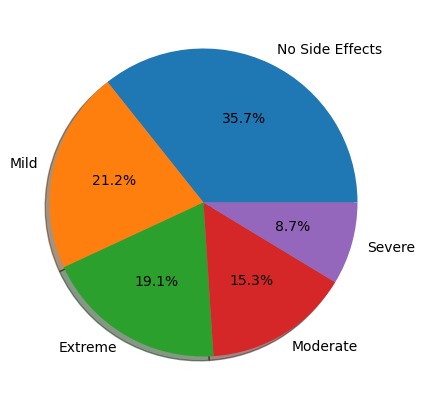

In [329]:
plt.figure(figsize=(5,5))
data_new['Side_Effects_Severity'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.ylabel("", fontsize = 20)
plt.show()

Observation : In case of Side effects severity, No side effects is of highest count followed by mild count.

Side Effects and Age

<AxesSubplot:xlabel='Age', ylabel='count'>

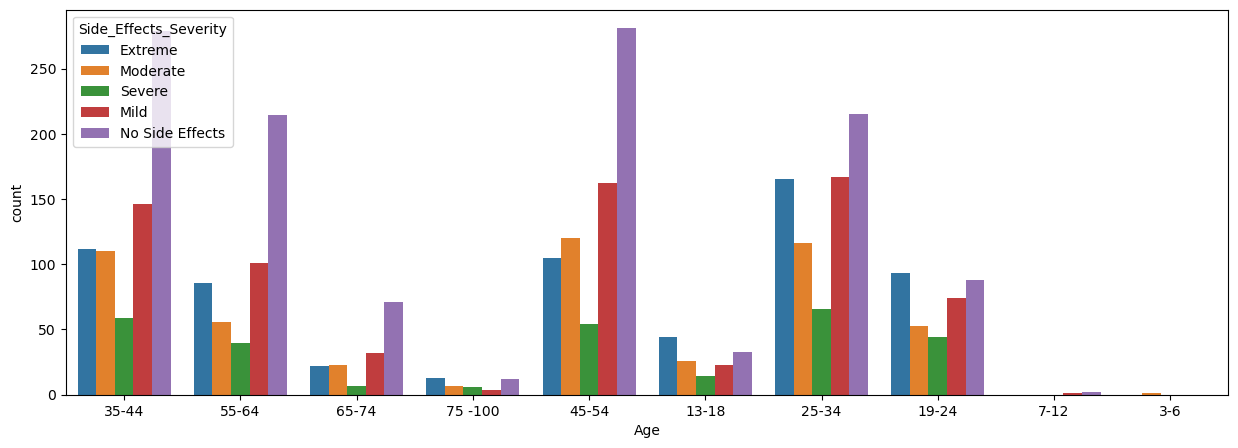

In [330]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Age',hue='Side_Effects_Severity',data=data_new)

Observation : No side effects are seen in age group 45-54 followed by 35-44 

Side Effects and Gender

<Figure size 2000x1000 with 0 Axes>

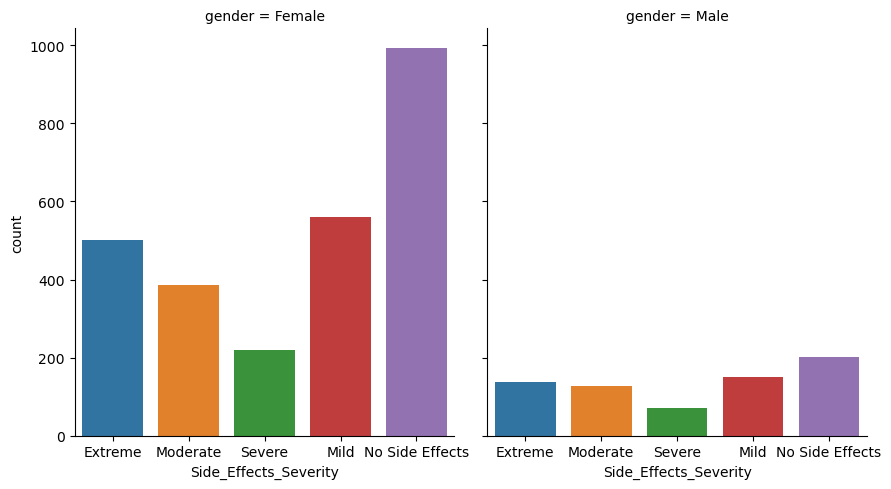

In [331]:
plt.figure(figsize=(20,10))

g = sns.catplot(x="Side_Effects_Severity",col="gender",data=data_new, kind="count",height=5,aspect =.9);

Observation : Both in female and male , it shows there are most number of cases with no side effects from the people who undertake this drug which concludes that the drug could be safer to consume across both genders.

<AxesSubplot:xlabel='Race', ylabel='count'>

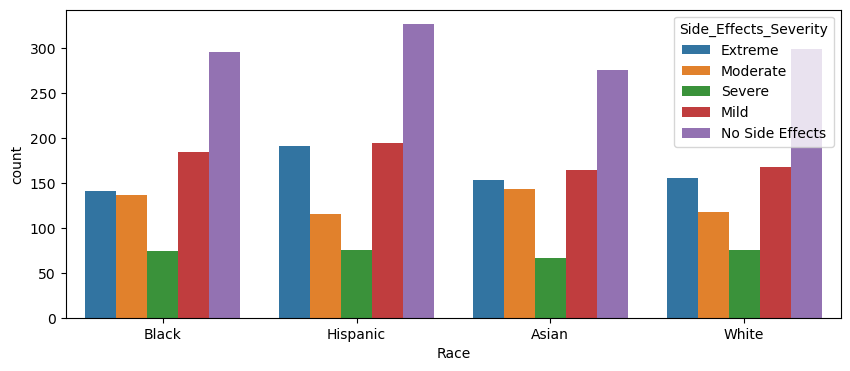

In [332]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Race',hue='Side_Effects_Severity',data=data_new)

Observation : Plot shows there are most number of cases having no side effects with regards to white people followed by hispanic people.

Visualisation with Heatmap

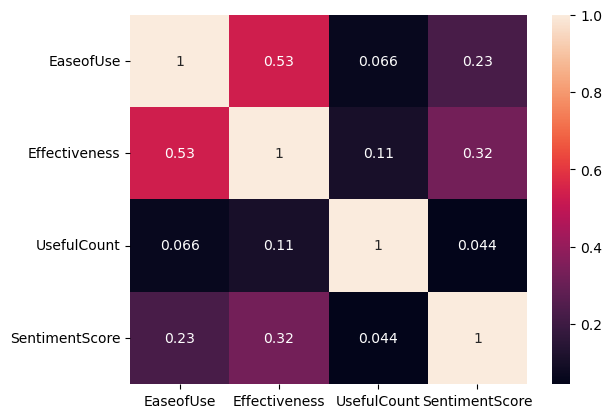

In [333]:
sns.heatmap(data_new.corr(), annot = True);

In [334]:
data_new.head()

,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,gender,Side_Effects,UsefulCount,Name,Race,SentimentScore,SentimentCategory,Side_Effects_Severity
21468,35-44,anxiousness associated with depression,2020-02-06,lexapro,1.0,1.0,I got horrible brain zaps graphic tragic dream...,Female,nausea mouth trouble sleeping constipation tir...,0.0,Jasmine French,Black,-0.400000,Negative,Extreme
21475,55-64,depression,2020-01-23,lexapro,5.0,3.0,It helped depression anxiety. And I trouble sl...,Male,nausea mouth trouble sleeping constipation tir...,0.0,Kara Green,Black,-0.200000,Negative,Moderate
21481,65-74,depression,2020-01-21,lexapro,3.0,1.0,Was nauseated almost immediately. Diareaha bed...,Female,nausea mouth trouble sleeping constipation tir...,0.0,April Garcia,Hispanic,0.038889,Positive,Extreme
21484,75 -100,anxiousness associated with depression,2019-12-27,lexapro,4.0,2.0,seen much difference.,Female,nausea mouth trouble sleeping constipation tir...,0.0,Elizabeth Bender,Black,0.200000,Positive,Severe
21489,35-44,depression,2019-12-20,lexapro,5.0,5.0,I started taking Zoloft I diagnosed depression...,Male,nausea mouth trouble sleeping constipation tir...,2.0,Stephen Gallagher,Asian,0.295833,Positive,Mild


# Differentiating numerical data and categorical data

In [335]:
num_data=data_new.select_dtypes(include=['int64','float64'])
num_data

,EaseofUse,Effectiveness,UsefulCount,SentimentScore
21468,1.0,1.0,0.0,-0.400000
21475,5.0,3.0,0.0,-0.200000
21481,3.0,1.0,0.0,0.038889
21484,4.0,2.0,0.0,0.200000
21489,5.0,5.0,2.0,0.295833
...,...,...,...,...
26639,5.0,5.0,1.0,0.311905
26640,5.0,1.0,2.0,0.019886
26641,4.0,3.0,1.0,0.500000
26642,5.0,5.0,23.0,0.100000


In [336]:
cat_data=data_new.select_dtypes(include=['object','bool'])
cat_data

,Age,Condition,Drug,Reviews,gender,Side_Effects,Name,Race,SentimentCategory,Side_Effects_Severity
21468,35-44,anxiousness associated with depression,lexapro,I got horrible brain zaps graphic tragic dream...,Female,nausea mouth trouble sleeping constipation tir...,Jasmine French,Black,Negative,Extreme
21475,55-64,depression,lexapro,It helped depression anxiety. And I trouble sl...,Male,nausea mouth trouble sleeping constipation tir...,Kara Green,Black,Negative,Moderate
21481,65-74,depression,lexapro,Was nauseated almost immediately. Diareaha bed...,Female,nausea mouth trouble sleeping constipation tir...,April Garcia,Hispanic,Positive,Extreme
21484,75 -100,anxiousness associated with depression,lexapro,seen much difference.,Female,nausea mouth trouble sleeping constipation tir...,Elizabeth Bender,Black,Positive,Severe
21489,35-44,depression,lexapro,I started taking Zoloft I diagnosed depression...,Male,nausea mouth trouble sleeping constipation tir...,Stephen Gallagher,Asian,Positive,Mild
...,...,...,...,...,...,...,...,...,...,...
26639,19-24,repeated episodes anxiety,lexapro,I taking Lexapro 8 weeks. The medicine working...,Male,nausea mouth trouble sleeping constipation tir...,Mark Suarez,Hispanic,Positive,Moderate
26640,19-24,bipolar depression,lexapro,I took Lexapro years ago never significant eff...,Male,nausea mouth trouble sleeping constipation tir...,Kevin Matthews,Hispanic,Positive,Severe
26641,55-64,other,lexapro,While I using medication I feel much better. I...,Female,nausea mouth trouble sleeping constipation tir...,Joshua Joseph,Black,Positive,Moderate
26642,19-24,depression,lexapro,This drug made feel like I felt whole life. I ...,Female,nausea mouth trouble sleeping constipation tir...,Emma Jones,Asian,Positive,No Side Effects


# Encoding

In [337]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
#for col in ['SideEffects', 'Drug','Age','Sex']:
for col in ['Race','Age','gender','Side_Effects_Severity','SentimentCategory']:   
    data_new[col]=label.fit_transform((data_new[col]).astype(str))
    
data_label=data_new

# Dropping columns not useful for further analysis

In [338]:
data_new.drop(['Condition','Date','Drug','Side_Effects','UsefulCount','Name','Reviews','SentimentScore'], inplace=True, axis=1)

In [339]:
data_new.head()

,Age,EaseofUse,Effectiveness,gender,Race,SentimentCategory,Side_Effects_Severity
21468,4,1.0,1.0,0,1,0,0
21475,6,5.0,3.0,1,1,0,2
21481,7,3.0,1.0,0,2,2,0
21484,9,4.0,2.0,0,1,2,4
21489,4,5.0,5.0,1,0,2,1


# Outlier Detection

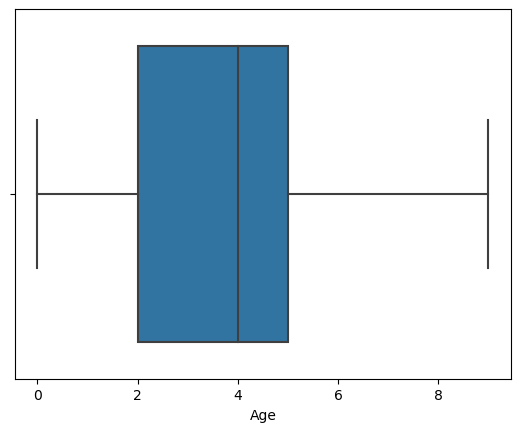

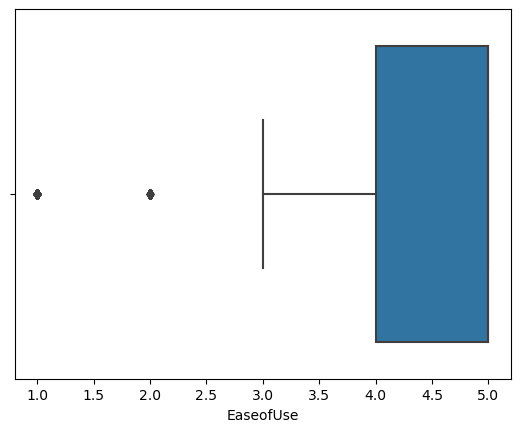

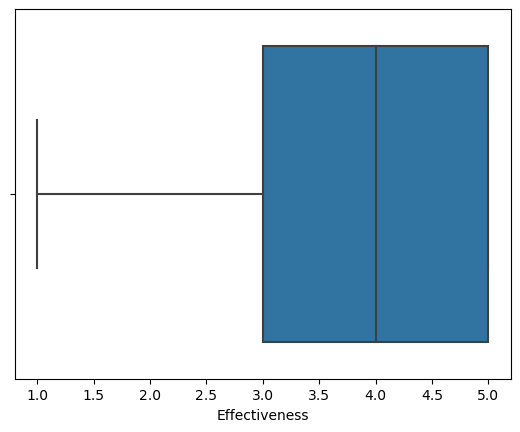

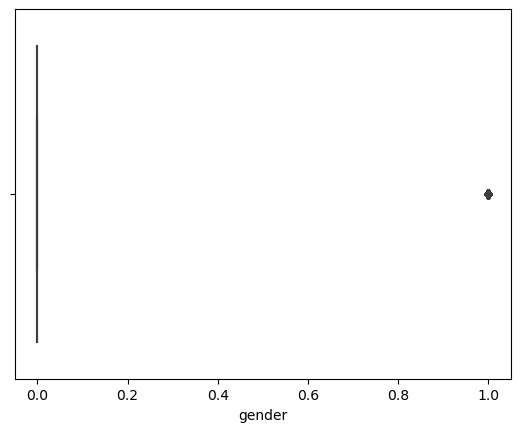

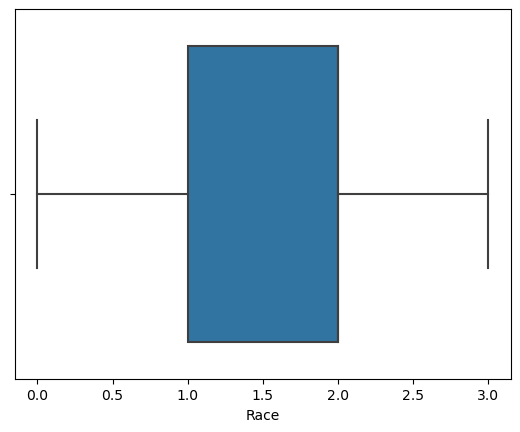

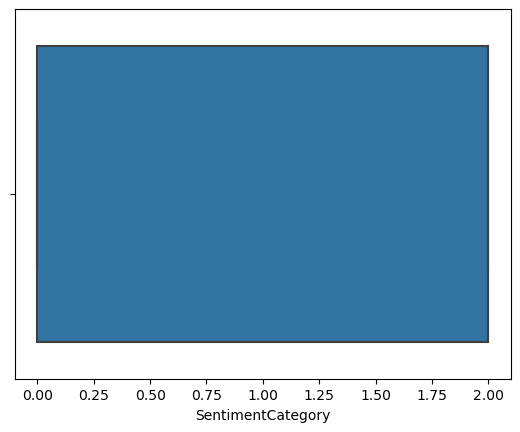

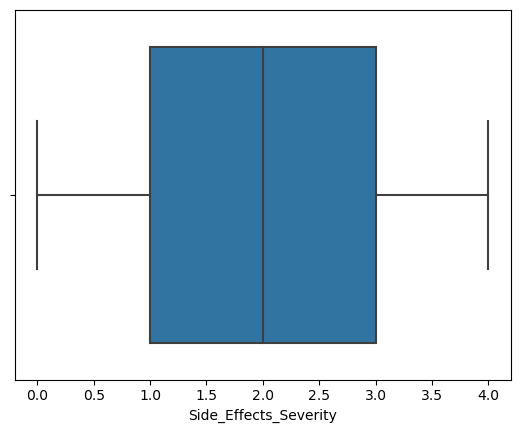

In [340]:
for i in data_new:
    sns.boxplot(x=data_new[i])
    plt.show()

Observation : Outlier is present in EaseOfUse column

Treating Outliers

In [341]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [342]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['EaseofUse']:
    index_list.extend(outliers(data_new,feature))
index_list

[21468,
 21547,
 21586,
 21670,
 21709,
 21817,
 21855,
 21895,
 21974,
 21980,
 22010,
 22096,
 22104,
 22182,
 22226,
 22243,
 22349,
 22359,
 22401,
 22410,
 22448,
 22517,
 22568,
 22587,
 22594,
 22612,
 22624,
 22649,
 22669,
 22692,
 22717,
 22793,
 22821,
 22850,
 22872,
 22878,
 22923,
 22947,
 23096,
 23111,
 23207,
 23247,
 23262,
 23310,
 23375,
 23385,
 23417,
 23454,
 23510,
 23524,
 23568,
 23719,
 23782,
 23824,
 23844,
 23912,
 23920,
 23944,
 23992,
 24058,
 24113,
 24122,
 24150,
 24166,
 24177,
 24185,
 24189,
 24191,
 24192,
 24215,
 24243,
 24252,
 24257,
 24274,
 24289,
 24293,
 24304,
 24320,
 24337,
 24352,
 24354,
 24358,
 24388,
 24390,
 24392,
 24400,
 24401,
 24402,
 24417,
 24442,
 24453,
 24477,
 24482,
 24536,
 24584,
 24585,
 24588,
 24591,
 24598,
 24607,
 24635,
 24645,
 24651,
 24685,
 24701,
 24703,
 24706,
 24709,
 24713,
 24730,
 24731,
 24746,
 24759,
 24764,
 24774,
 24777,
 24780,
 24801,
 24809,
 24829,
 24849,
 24870,
 24878,
 24891,
 24900,


In [343]:
#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

In [344]:
data_new.shape

(3347, 7)

In [345]:
data_new=remove(data_new,index_list)

In [346]:
data_new.head()

,Age,EaseofUse,Effectiveness,gender,Race,SentimentCategory,Side_Effects_Severity
21475,6,5.0,3.0,1,1,0,2
21481,7,3.0,1.0,0,2,2,0
21484,9,4.0,2.0,0,1,2,4
21489,4,5.0,5.0,1,0,2,1
21496,5,5.0,5.0,0,3,2,3


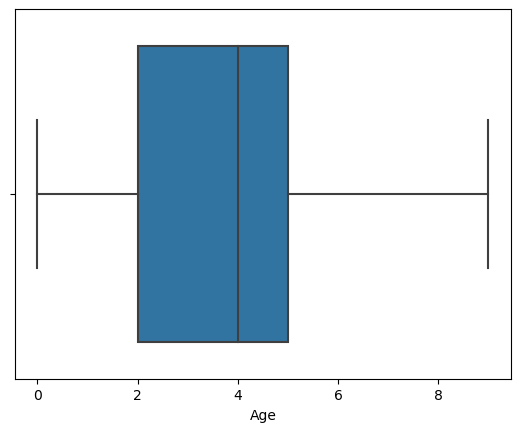

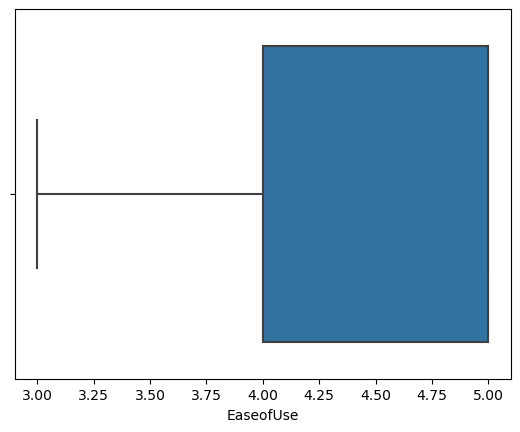

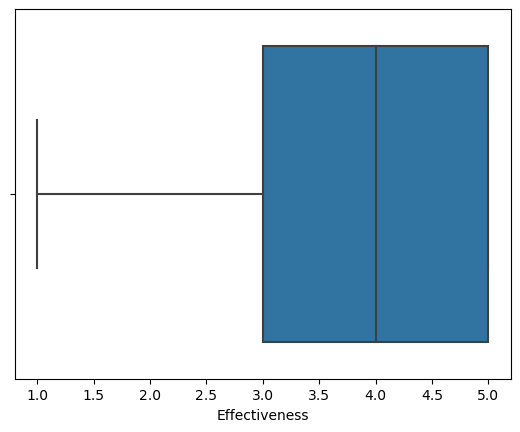

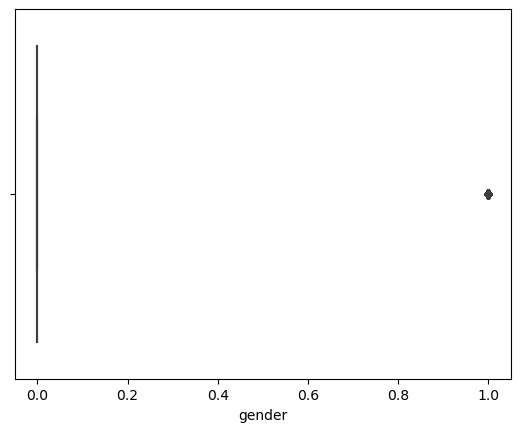

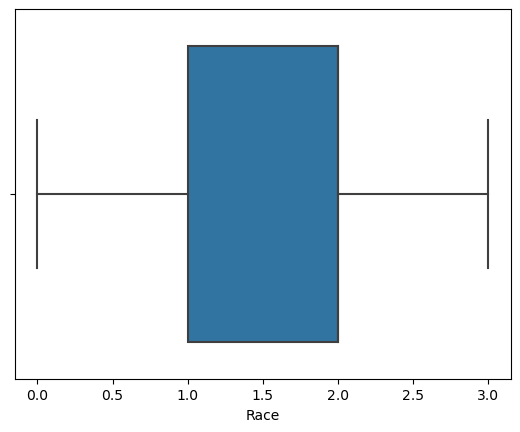

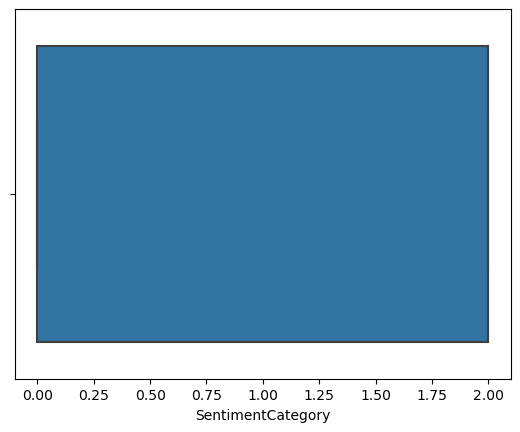

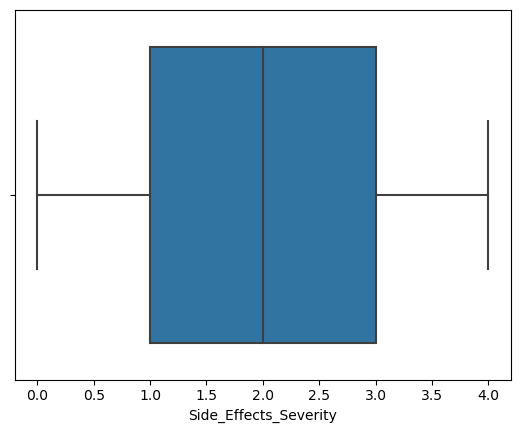

In [347]:
#Outliers are removed
for i in data_new:
    sns.boxplot(x=data_new[i])
    plt.show()

# Scaling

In [348]:
from sklearn.preprocessing import MinMaxScaler

In [349]:
data_new.head()

,Age,EaseofUse,Effectiveness,gender,Race,SentimentCategory,Side_Effects_Severity
21475,6,5.0,3.0,1,1,0,2
21481,7,3.0,1.0,0,2,2,0
21484,9,4.0,2.0,0,1,2,4
21489,4,5.0,5.0,1,0,2,1
21496,5,5.0,5.0,0,3,2,3


In [350]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is a DataFrame containing the columns mentioned

# Extract the columns to be scaled
columns_to_scale = ['Age', 'EaseofUse', 'Effectiveness', 'gender', 'Race', 'SentimentCategory']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the selected columns
scaler.fit(data_new[columns_to_scale])

# Transform the selected columns using the scaler
data_new[columns_to_scale] = scaler.transform(data_new[columns_to_scale])


In [351]:
data_new.head()

,Age,EaseofUse,Effectiveness,gender,Race,SentimentCategory,Side_Effects_Severity
21475,0.666667,1.0,0.50,1.0,0.333333,0.0,2
21481,0.777778,0.0,0.00,0.0,0.666667,1.0,0
21484,1.000000,0.5,0.25,0.0,0.333333,1.0,4
21489,0.444444,1.0,1.00,1.0,0.000000,1.0,1
21496,0.555556,1.0,1.00,0.0,1.000000,1.0,3


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

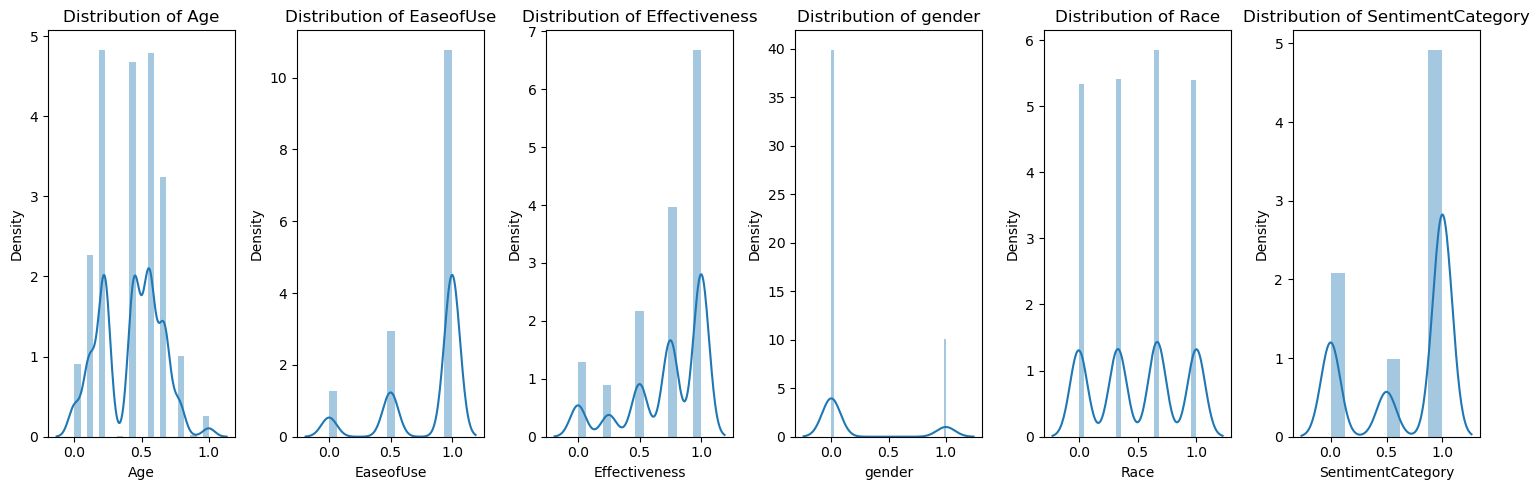

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_new' is a DataFrame containing the sentiment scores

# Get the list of column names in the DataFrame excluding the last column
columns_to_plot = data_new.columns[:-1]

# Create subplots based on the number of columns to plot
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

# Loop through each column (except the last one) and plot its distribution
for idx, column in enumerate(columns_to_plot):
    sns.distplot(data_new[column], ax=axes[idx])
    axes[idx].set_title("Distribution of " + column)

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


# Train-Test Split 

In [353]:
X = data_new.drop(['Side_Effects_Severity'],axis=1)
#y = #target
y =  data_new['Side_Effects_Severity']

In [354]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)#assigninng values

In [355]:
X_train.shape

(2474, 6)

In [356]:
X_test.shape

(619, 6)

In [357]:
y_train.shape

(2474,)

In [358]:
y_test.shape

(619,)

# Building and Evaluating the model

# Logistic Regression Model

In [359]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logit_model = LogisticRegression(multi_class='multinomial')
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

In [360]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report

In [361]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)


Accuracy is :  63.32794830371567


In [362]:
confusion_matrix(y_test,y_pred)

array([[ 59,   3,  13,   4,   0],
       [  0,  66,  23,  41,   0],
       [  8,  29,  52,  21,   0],
       [  0,  30,   3, 215,   0],
       [ 23,  10,  12,   7,   0]], dtype=int64)

In [363]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70        79
           1       0.48      0.51      0.49       130
           2       0.50      0.47      0.49       110
           3       0.75      0.87      0.80       248
           4       0.00      0.00      0.00        52

    accuracy                           0.63       619
   macro avg       0.48      0.52      0.50       619
weighted avg       0.57      0.63      0.60       619



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine Model

 Linear SVM

In [364]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')#creating an instance
svm_linear.fit(X_train,y_train)
y_pred = svm_linear.predict(X_test)

In [365]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  65.10500807754443


In [366]:
confusion_matrix(y_test,y_pred)

array([[ 56,   5,  14,   4,   0],
       [  0,  76,  14,  40,   0],
       [  5,  29,  55,  21,   0],
       [  0,  28,   4, 216,   0],
       [ 19,   7,  19,   7,   0]], dtype=int64)

In [367]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70        79
           1       0.52      0.58      0.55       130
           2       0.52      0.50      0.51       110
           3       0.75      0.87      0.81       248
           4       0.00      0.00      0.00        52

    accuracy                           0.65       619
   macro avg       0.50      0.53      0.51       619
weighted avg       0.59      0.65      0.62       619



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [368]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create an instance of the SVM model with a linear kernel
svm_linear = SVC(kernel='linear')

# Define the hyperparameters and their respective ranges to search over
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],    # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize GridSearchCV with the SVM model and the parameter grid
grid_search = GridSearchCV(svm_linear, param_grid, cv=5)

# Fit the grid search to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
print("Best hyperparameters:", best_params)
print("Accuracy score:", accuracy)
print("Accuracy score is : ", accuracy*100)

Best hyperparameters: {'C': 100, 'gamma': 'scale'}
Accuracy score: 0.654281098546042
Accuracy score is :  65.4281098546042


Polynomial SVM

In [369]:
svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(X_train,y_train)
y_pred = svm_poly.predict(X_test)

In [370]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  64.45880452342489


In [371]:
confusion_matrix(y_test,y_pred)

array([[ 59,   2,  12,   4,   2],
       [  5,  67,  18,  40,   0],
       [ 12,  26,  49,  21,   2],
       [  0,  27,   5, 216,   0],
       [ 13,   6,  18,   7,   8]], dtype=int64)

In [372]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70        79
           1       0.52      0.52      0.52       130
           2       0.48      0.45      0.46       110
           3       0.75      0.87      0.81       248
           4       0.67      0.15      0.25        52

    accuracy                           0.64       619
   macro avg       0.62      0.55      0.55       619
weighted avg       0.64      0.64      0.62       619



Radial SVM

In [373]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)

In [374]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  65.4281098546042


In [375]:
confusion_matrix(y_test,y_pred)

array([[ 58,   5,  12,   4,   0],
       [  0,  74,  16,  40,   0],
       [  7,  29,  51,  21,   2],
       [  0,  29,   4, 215,   0],
       [ 11,   7,  20,   7,   7]], dtype=int64)

In [376]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        79
           1       0.51      0.57      0.54       130
           2       0.50      0.46      0.48       110
           3       0.75      0.87      0.80       248
           4       0.78      0.13      0.23        52

    accuracy                           0.65       619
   macro avg       0.66      0.55      0.56       619
weighted avg       0.66      0.65      0.64       619



# DecisionTreeClassifier Model

In [377]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and fit the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score is : ", accuracy*100)

Accuracy score is :  58.64297253634895


In [378]:
confusion_matrix(y_test,y_pred)

array([[ 50,   5,  10,   4,  10],
       [  4,  58,  19,  44,   5],
       [ 10,  33,  40,  16,  11],
       [  2,  30,   9, 207,   0],
       [ 18,  12,   8,   6,   8]], dtype=int64)

In [379]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61        79
           1       0.42      0.45      0.43       130
           2       0.47      0.36      0.41       110
           3       0.75      0.83      0.79       248
           4       0.24      0.15      0.19        52

    accuracy                           0.59       619
   macro avg       0.49      0.49      0.49       619
weighted avg       0.57      0.59      0.57       619



# RandomForestClassifier

In [380]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and fit the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score is : ", accuracy*100)

Accuracy score is :  59.77382875605816


In [381]:
confusion_matrix(y_test,y_pred)

array([[ 58,   4,   6,   4,   7],
       [  2,  51,  26,  44,   7],
       [ 10,  32,  40,  18,  10],
       [  1,  26,   9, 212,   0],
       [ 16,  10,  10,   7,   9]], dtype=int64)

In [382]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        79
           1       0.41      0.39      0.40       130
           2       0.44      0.36      0.40       110
           3       0.74      0.85      0.80       248
           4       0.27      0.17      0.21        52

    accuracy                           0.60       619
   macro avg       0.51      0.50      0.50       619
weighted avg       0.57      0.60      0.58       619



In [383]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their respective ranges to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Perform grid search using cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score is:", accuracy * 100)


Accuracy score is: 64.13570274636511


# KNN Model

In [396]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1, 15)


for k in neighbors:
    knnclf = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    knnclf.fit (X_train,y_train)
    y_pred = knnclf.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [397]:
metric_k

[0.5347334410339257,
 0.4991922455573506,
 0.6025848142164781,
 0.5831987075928917,
 0.5993537964458805,
 0.5912762520193862,
 0.6009693053311793,
 0.5864297253634895,
 0.5945072697899838,
 0.617124394184168,
 0.6009693053311793,
 0.6187399030694669,
 0.6009693053311793,
 0.6025848142164781]

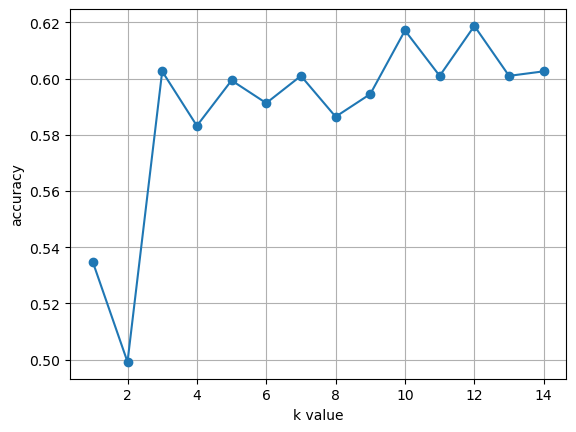

In [398]:
plt.plot (neighbors, metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [399]:
knnclf = KNeighborsClassifier(n_neighbors=12,metric='minkowski',p=2)
knnclf.fit (X_train,y_train)
y_pred = knnclf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
 

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [401]:
print('accuracy = ', accuracy_score(y_test,y_pred))

accuracy =  0.6187399030694669


In [389]:
print( confusion_matrix(y_test,y_pred))

[[ 56   6   9   4   4]
 [  1  69  23  36   1]
 [  8  37  42  20   3]
 [  1  32   4 210   1]
 [ 15  16  10   6   5]]


In [390]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        79
           1       0.43      0.53      0.48       130
           2       0.48      0.38      0.42       110
           3       0.76      0.85      0.80       248
           4       0.36      0.10      0.15        52

    accuracy                           0.62       619
   macro avg       0.54      0.51      0.51       619
weighted avg       0.60      0.62      0.60       619



# Gradient Boosting Model

In [391]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize and fit the Gradient Boosting Classifier model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [392]:
print("Accuracy score is : ", accuracy*100)

Accuracy score is :  66.23586429725363


In [393]:
confusion_matrix(y_test,y_pred)

array([[ 57,   4,  10,   4,   4],
       [  0,  76,  17,  37,   0],
       [  5,  31,  51,  18,   5],
       [  0,  30,   4, 214,   0],
       [ 12,   8,  14,   6,  12]], dtype=int64)

In [394]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75        79
           1       0.51      0.58      0.54       130
           2       0.53      0.46      0.50       110
           3       0.77      0.86      0.81       248
           4       0.57      0.23      0.33        52

    accuracy                           0.66       619
   macro avg       0.63      0.57      0.59       619
weighted avg       0.66      0.66      0.65       619



# Hyperparameter Tuning for Gradient Boosting Model

In [395]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Gradient Boosting Classifier model
gb = GradientBoostingClassifier()

# Define the hyperparameters and their respective ranges to search over
param_grid = {
    'n_estimators': [50, 100, 150],         # Number of boosting stages to be run
    'learning_rate': [0.05, 0.1, 0.2],      # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 4, 5],                 # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]           # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV with the Gradient Boosting Classifier and the parameter grid
grid_search = GridSearchCV(gb, param_grid, cv=5)

# Fit the grid search to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
print("Best hyperparameters:", best_params)
print("Accuracy score:", accuracy)
print("Accuracy score is : ", accuracy*100)

Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy score: 0.6558966074313409
Accuracy score is :  65.58966074313409


# List of Classification Models with the Accuracy Score :


1	Logistic Regression Model	: 63.32794830

2	Support Vector Machine(Linear) : 65.10500807

3	Decision Tree : 58.64297253

4	Random Forest : 59.77382875

5	K- Nearest Neighbor	 : 61.87399030

6	Gradient Boosting : 66.23586429

Also we have done Hyperparameter tuning on gradient boosting resulting an accuracy score of around 66%, therefore we select gradient boosting as our best model for this data analysis.


# Conclusion 



Throughout the internship, various exploratory data analysis (EDA) techniques were employed to gain insights into the dataset obtained from WebMD. Visualizations such as bar plots, pie charts, and heatmaps were used to analyze drug usage, side effects severity, effectiveness, and sentiments based on user reviews, demographics, and clinical data. Data preprocessing was carried out to handle missing values, convert categorical data into numeric format using encoding techniques, and detect and treat outliers using the IQR method. TextBlob library was used for sentiment analysis of user reviews, which helped classify sentiments into positive, negative, and neutral categories. The data was then scaled using MinMaxScaler to normalize input variables, and the dataset was split into train and test sets for model evaluation. Several classification models, including Logistic Regression, Decision Tree, Random Forest, KNN, Support Vector Machine, and Gradient Boosting, were built and evaluated. Gradient Boosting performed the best, achieving an accuracy of around 66%, even after hyperparameter optimization. The conclusion drawn from the analysis is that Gradient Boosting is the most effective model for drug side effect classification based on the provided dataset. This model can accurately predict drug side effects for patients based on their demographic and clinical data, and it shows potential for application in precision medicine and personalized treatment decisions. 
